In [703]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as c
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold

In [704]:
df=pd.read_csv("C:\\Users\\91701\\Desktop\\Customer Conversion Prediction - Customer Conversion Prediction.csv")

In [705]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [706]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [707]:
df=df.drop(columns="call_type")

In [708]:
df

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,unknown,no
1,44,technician,single,secondary,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,17,nov,508,4,unknown,no


checking if any null values are there

In [709]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Datatype checking

In [710]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [711]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,6,4


In [712]:
intcolumns=[i for i in df.columns if df[i].dtype=='int64']
intcolumns

['age', 'day', 'dur', 'num_calls']

In [713]:
objectcolumns=[i for i in df.columns if df[i].dtype=='object']
objectcolumns

['job', 'marital', 'education_qual', 'mon', 'prev_outcome', 'y']

In [714]:
for i in objectcolumns:
    print(i,'is divided into',len(df[i].value_counts()),' categories')

job is divided into 12  categories
marital is divided into 3  categories
education_qual is divided into 4  categories
mon is divided into 12  categories
prev_outcome is divided into 4  categories
y is divided into 2  categories


In [715]:
for i in intcolumns:
    print(i,'is divided into', len(df[i].value_counts()),"categories")

age is divided into 77 categories
day is divided into 31 categories
dur is divided into 1573 categories
num_calls is divided into 48 categories


In [720]:
df["job"].value_counts()

blue-collar      10972
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
student            938
Name: job, dtype: int64

In [718]:
df=df[df['job']!='unknown']

In [719]:
df['job']=df['job'].replace({'housemaid':'blue-collar'})

In [721]:
df['marital'].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [722]:
df['education_qual'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education_qual, dtype: int64

In [723]:
df=df[df['education_qual']!='unknown']

In [724]:
df

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,unknown,no
1,44,technician,single,secondary,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,5,may,76,1,unknown,no
5,35,management,married,tertiary,5,may,139,1,unknown,no
6,28,management,single,tertiary,5,may,217,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,17,nov,508,4,unknown,no


In [725]:
df['mon'].value_counts()

may    13192
jul     6601
aug     6037
jun     4980
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [726]:
df['prev_outcome'].value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [727]:
df=df.drop(['prev_outcome'],axis=1)

In [728]:
df

,age,job,marital,education_qual,day,mon,dur,num_calls,y
0,58,management,married,tertiary,5,may,261,1,no
1,44,technician,single,secondary,5,may,151,1,no
2,33,entrepreneur,married,secondary,5,may,76,1,no
5,35,management,married,tertiary,5,may,139,1,no
6,28,management,single,tertiary,5,may,217,1,no
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,17,nov,977,3,yes
45207,71,retired,divorced,primary,17,nov,456,2,yes
45208,72,retired,married,secondary,17,nov,1127,5,yes
45209,57,blue-collar,married,secondary,17,nov,508,4,no


In [729]:
df['y'].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

In [730]:
!pip3 install imbalanced-learn

In [731]:
df['age'].value_counts()

32    2042
31    1947
33    1931
34    1882
35    1834
      ... 
89       3
90       2
95       2
88       2
94       1
Name: age, Length: 75, dtype: int64

In [732]:
df['age'].isnull().value_counts() #no null values

False    43193
Name: age, dtype: int64

In [733]:
df['day'].value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1760
28    1740
7     1739
29    1661
19    1657
15    1649
12    1542
13    1529
9     1484
30    1481
11    1397
4     1372
16    1331
2     1244
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

In [734]:
df['num_calls'].value_counts()

1     16742
2     11938
3      5277
4      3399
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [735]:
df.shape

(43193, 9)

Data Visualization

Text(0.5, 1.0, 'Month when people are contacted')

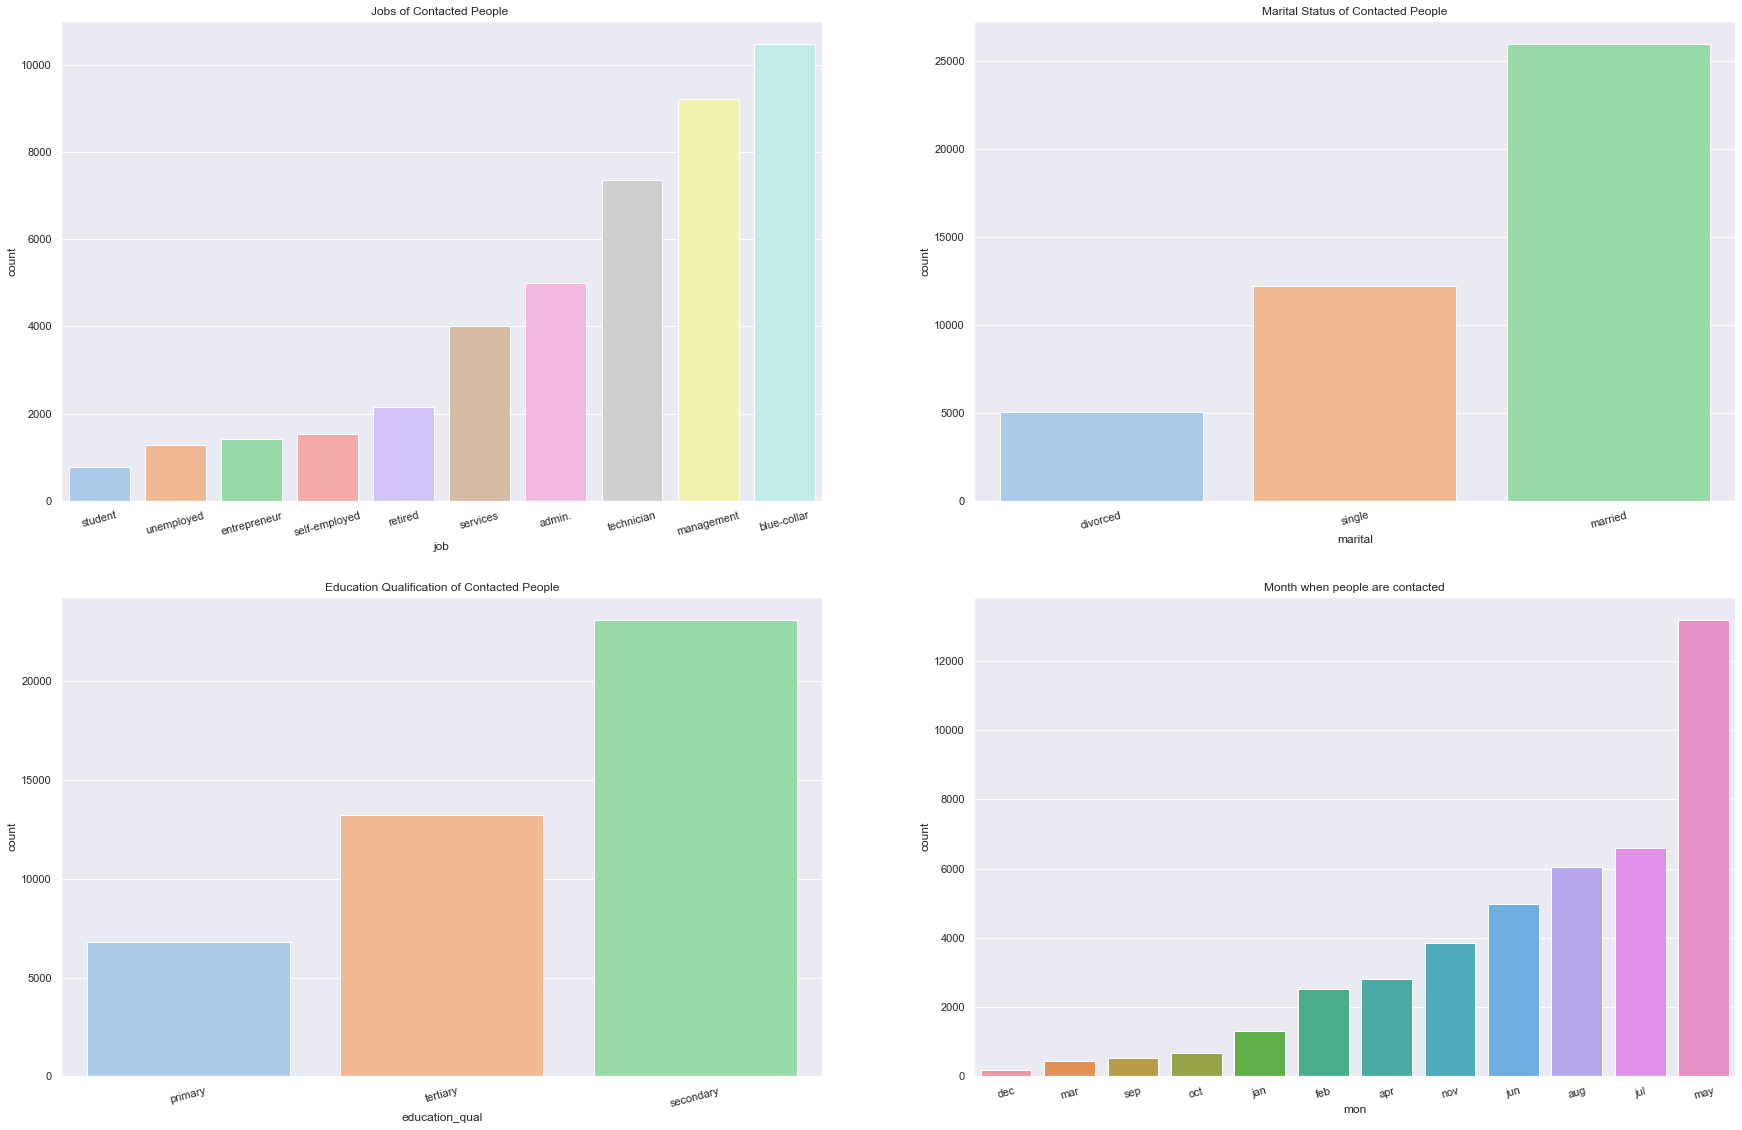

In [736]:
c.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(30,30))
plt.subplot(321)
c.countplot(df["job"],order=df["job"].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.title('Jobs of Contacted People ')


plt.subplot(322)
c.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.title('Marital Status of Contacted People')


plt.subplot(323)
c.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.title("Education Qualification of Contacted People")


plt.subplot(324)
c.countplot(df["mon"],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.title('Month when people are contacted')


In [737]:
df['y']=df['y'].replace({'no':0,'yes':1})

Text(0.5, 1.0, 'Month vs Count of people taken insurance or not ')

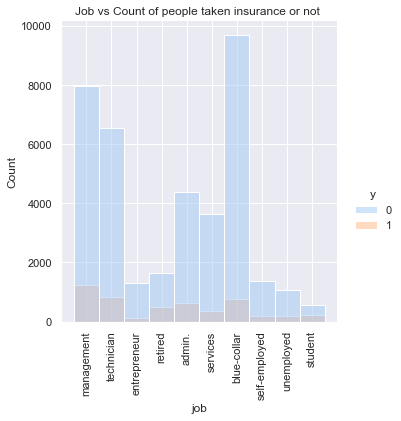

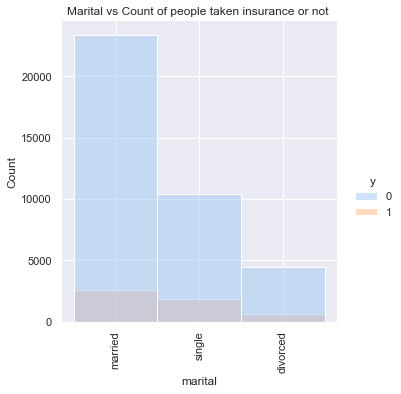

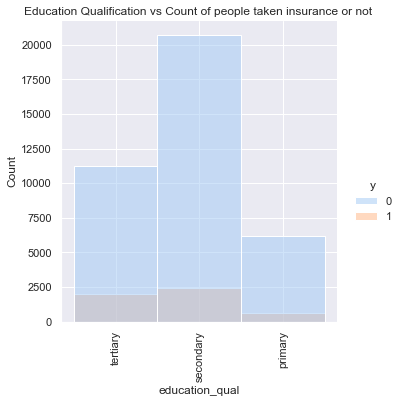

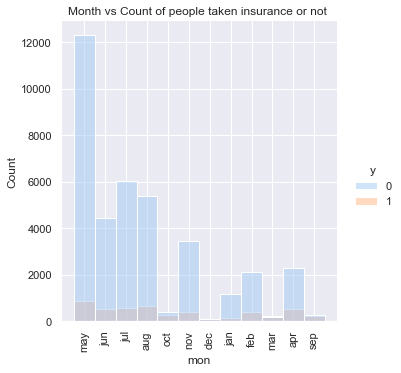

In [738]:
c.displot(x=df['job'],hue=df['y'])
plt.xticks(rotation=90)
plt.title("Job vs Count of people taken insurance or not ")

c.displot(data=df,x='marital',hue='y')
plt.xticks(rotation=90)
plt.title("Marital vs Count of people taken insurance or not ")

c.displot(data=df,x='education_qual',hue='y')
plt.xticks(rotation=90)
plt.title("Education Qualification vs Count of people taken insurance or not ")


c.displot(data=df,x='mon',hue='y')
plt.xticks(rotation=90)
plt.title("Month vs Count of people taken insurance or not ")


Text(0.5, 1.0, 'No: of calls vs Outcome')

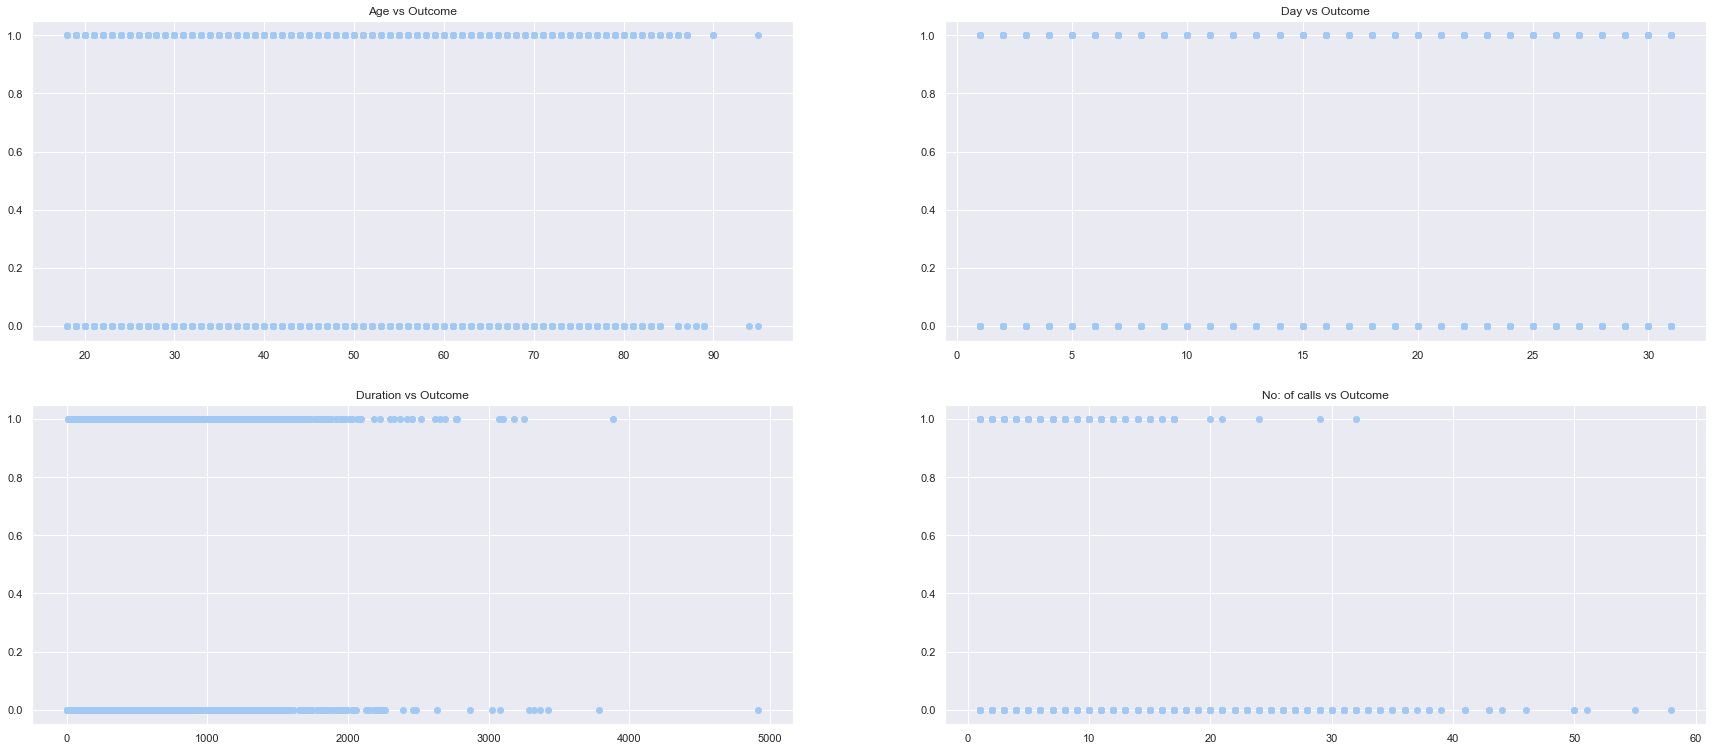

In [739]:
plt.figure(figsize=(30,20))
plt.subplot(321)
plt.scatter(df['age'],df['y'])
plt.title("Age vs Outcome")

plt.subplot(322)
plt.scatter(df['day'],df['y'])
plt.title("Day vs Outcome")

plt.subplot(323)
plt.scatter(df['dur'],df['y'])
plt.title("Duration vs Outcome")

plt.subplot(324)
plt.scatter(df["num_calls"],df["y"])
plt.title('No: of calls vs Outcome')


DataEncoding

In [740]:
dfjob=pd.get_dummies(df['job'])

In [741]:
df['education_qual']=df['education_qual'].replace({'tertiary':1, 'secondary':2, 'primary':3})

In [742]:
df['mon']=df['mon'].replace({'may':11, 'jun':8, 'jul':10, 'aug':9, 'oct':3, 'nov':7, 'dec':0, 'jan':4, 'feb':5,
       'mar':1, 'apr':6, 'sep':2})

In [743]:
df3=pd.get_dummies(df['marital'])

In [744]:
df=df.drop(columns=['marital','job'])

In [745]:
dfn=pd.concat([dfjob,df3,df],axis=1)
dfn

,admin.,blue-collar,entrepreneur,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,age,education_qual,day,mon,dur,num_calls,y
0,0,0,0,1,0,0,0,0,0,0,0,1,0,58,1,5,11,261,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,44,2,5,11,151,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,5,11,76,1,0
5,0,0,0,1,0,0,0,0,0,0,0,1,0,35,1,5,11,139,1,0
6,0,0,0,1,0,0,0,0,0,0,0,0,1,28,1,5,11,217,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,0,1,0,51,1,17,7,977,3,1
45207,0,0,0,0,1,0,0,0,0,0,1,0,0,71,3,17,7,456,2,1
45208,0,0,0,0,1,0,0,0,0,0,0,1,0,72,2,17,7,1127,5,1
45209,0,1,0,0,0,0,0,0,0,0,0,1,0,57,2,17,7,508,4,0


In [746]:
dfn.columns

Index(['admin.', 'blue-collar', 'entrepreneur', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'divorced', 'married', 'single', 'age', 'education_qual', 'day', 'mon',
       'dur', 'num_calls', 'y'],
      dtype='object')

Train Test Split

In [747]:
x=dfn.loc[:,['admin.', 'blue-collar', 'entrepreneur', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
        'divorced', 'married', 'single', 'age', 'education_qual',
       'day', 'mon', 'dur', 'num_calls']]

In [748]:
y=dfn.loc[:,['y']]

In [749]:
pd.DataFrame(y).value_counts()

y
0    38172
1     5021
dtype: int64

In [750]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Balancing the data

In [751]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(x_train, y_train)

Modeling

In [769]:
kf=StratifiedKFold(n_splits=10)

In [752]:
model1=LogisticRegression(max_iter=10000)

In [753]:
model1.fit(X_over,np.array(y_over).reshape(y_over.shape[0],))
y_pred1=model1.predict(x_test)

In [770]:
cross_val_score(model1,x_test,y_test,cv=kf,scoring='accuracy').mean()

0.8914182635015967

In [755]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(random_state=1)

In [756]:
model2=DecisionTreeClassifier(max_depth= 15,random_state=1)
model2.fit(X_over,np.array(y_over).reshape(y_over.shape[0],))
y_pred2=model2.predict(x_test)

In [771]:
cross_val_score(model2,x_test,y_test,cv=kf,scoring='accuracy').mean()

0.8718934410601078

In [758]:
from sklearn.ensemble import RandomForestClassifier

In [759]:
model3=RandomForestClassifier(max_depth= 15,random_state=1)
model3.fit(X_over,np.array(y_over).reshape(y_over.shape[0],))
y_pred3=model3.predict(x_test)

In [772]:
cross_val_score(model3,x_test,y_test,cv=kf,scoring='accuracy').mean()

0.8939654535487869

In [761]:
model4 = AdaBoostClassifier(random_state=1,base_estimator = RandomForestClassifier(),n_estimators=200,learning_rate = 0.005)
model4.fit(X_over,np.array(y_over).reshape(y_over.shape[0],))

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.005,
                   n_estimators=200, random_state=1)

In [762]:
y_pred4=model4.predict(x_test)

In [773]:
cross_val_score(model4,x_test,y_test,cv=kf,scoring='accuracy').mean()

0.8951225630392298

In [764]:
from xgboost import XGBClassifier
model6=XGBClassifier(random_state=1)
model6.fit(X_over,np.array(y_over).reshape(y_over.shape[0],))
y_pred6=model6.predict(x_test)

In [774]:
cross_val_score(model6,x_test,y_test,cv=kf,scoring='accuracy').mean()

0.8958945254778587

In [779]:
print(roc_auc_score(y_test,y_pred1)) #LogisticRegression
print(roc_auc_score(y_test,y_pred2)) #DecisionTreeClassifier
print(roc_auc_score(y_test,y_pred3)) #RandomForestClassifier
print(roc_auc_score(y_test,y_pred4)) #AdaBoostClassifier
print(roc_auc_score(y_test,y_pred6)) #XGBClassifier

0.7858490820433092
0.7607700905310609
0.8241610115748834
0.8168315151492609
0.8260473465546869


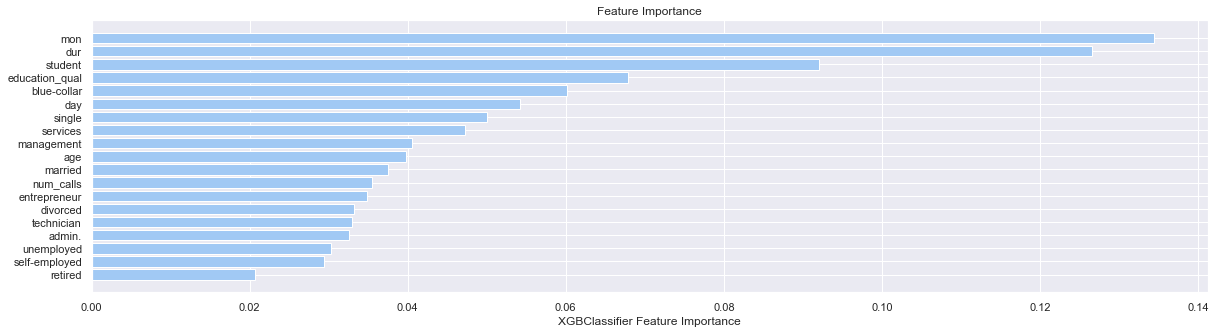

In [775]:
sorted_idx = model6.feature_importances_.argsort()
plt.figure(figsize=(20,5))
plt.barh(dfn.columns[sorted_idx], model6.feature_importances_[sorted_idx])
plt.xlabel("XGBClassifier Feature Importance")
plt.title("Feature Importance")
plt.show()

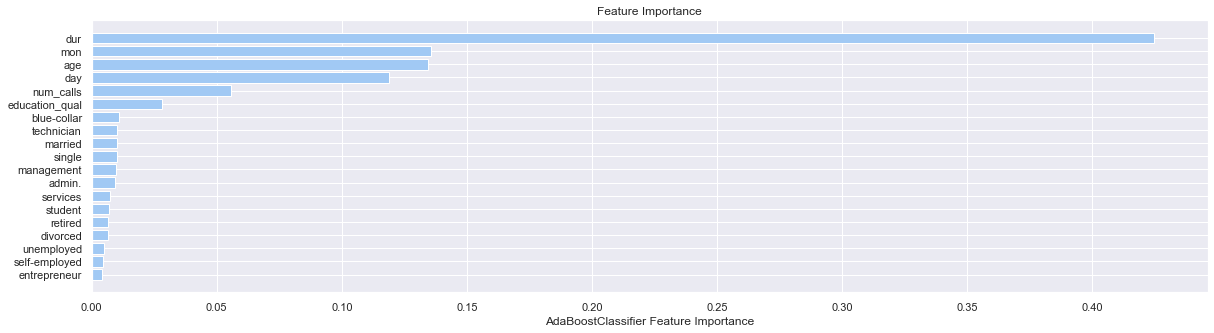

In [776]:
sorted_idx = model4.feature_importances_.argsort()
plt.figure(figsize=(20,5))
plt.barh(dfn.columns[sorted_idx], model4.feature_importances_[sorted_idx])
plt.xlabel("AdaBoostClassifier Feature Importance")
plt.title("Feature Importance")
plt.show()

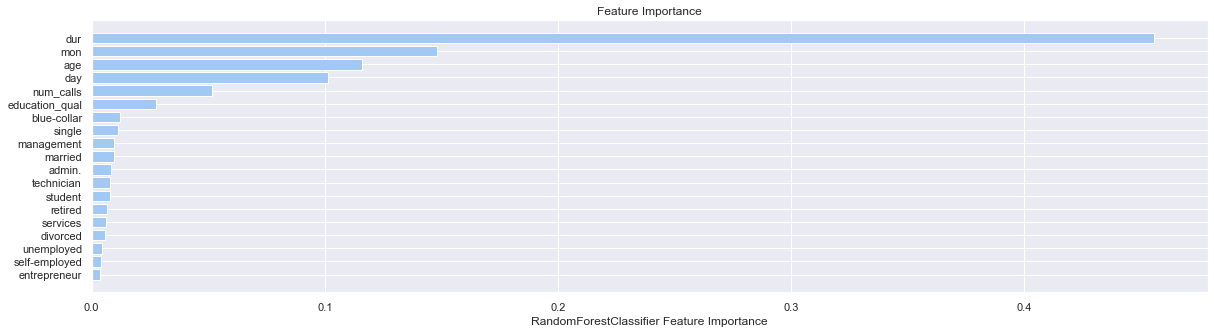

In [777]:
sorted_idx = model3.feature_importances_.argsort()
plt.figure(figsize=(20,5))
plt.barh(dfn.columns[sorted_idx], model3.feature_importances_[sorted_idx])
plt.xlabel("RandomForestClassifier Feature Importance")
plt.title("Feature Importance")
plt.show()

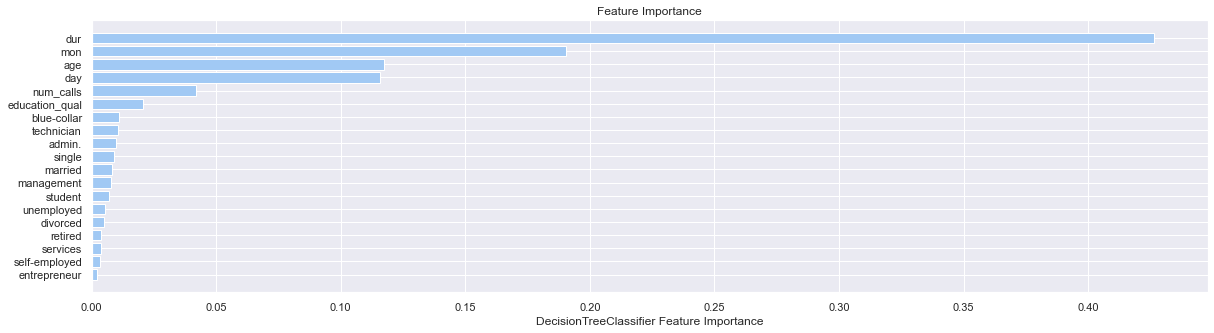

In [778]:
sorted_idx = model2.feature_importances_.argsort()
plt.figure(figsize=(20,5))
plt.barh(dfn.columns[sorted_idx], model2.feature_importances_[sorted_idx])
plt.xlabel("DecisionTreeClassifier Feature Importance")
plt.title("Feature Importance")
plt.show()